# 2
Usando lo visto en clase y las condiciones KKT, escriba el problema dual de SVM para el caso
no separable más general (con variables de holgura y función transformadora φ). Con la función
`quadprog` de Matlab (o su equivalente en Python o cualquier otro lenguaje de su escogencia) y un
código para la función de generalización de su autoría, resuelva el problema con la base de datos flor
de iris (https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) para clasificar las clases de
plantas Iris-Setosa e Iris-Virgínica. Use varios valores de C y diferentes tipos de kernels. Determine
el error de su clasificación en cada caso y obtenga conclusiones.


## Caso no Separable
Antes de empezar a desarrollar cada iten de esta parte 2 entenderemos lo que son los casos no separble. Se entiende como caso no seprable cuando no existe un clasificador lineal que pueda clasificar correctamente todos los puntos por ende algunos errores de clasificación pueden ocurrir. Existen tres tipos de puntos mal clasificados.

### 1. Puntos en la frontera o fuera del margen en el lado correcto del clasificador:
- es decir cuando: $$ y_n f(\mathbf{x}_n) \geq 1  $$

- Estos puntos se encuentran en la frontera del margen de decisión o en el lado correcto, pero potencialmente fuera del margen. No cometen errores de clasificación.
- Variables de holgura: $ \xi_n = 0 $ ya que estos puntos no requieren ninguna holgura para ser clasificados correctamente.

### 2. Puntos en el lado correcto del clasificador, pero dentro del margen:
- Cuando: $$ 0 < y_n f(\mathbf{x}_n) < 1 $$
- Estos puntos están correctamente clasificados pero se encuentran dentro del margen. Cometen un error de margen.
- Variables de holgura: $ 0 < \xi_n < 1 $. El valor de $ \xi_n $ mide el grado de violación del margen por parte del punto correspondiente.

Las variables de holgura $ \xi_n $ son fundamentales en la formulación del problema de optimización de SVM. Permiten que el modelo tolere ciertas violaciones del margen, siendo reguladas por el parámetro de penalización $ C $, y forman parte del objetivo de minimización en la función de coste de SVM.

### 3. Puntos que se encuentran en el lugar equivocado del clasificador:
- Cuando: $y_n f(\mathbf{x}_n) \leq 0$
- Estos puntos están mal clasificados y se encuentran en el lado incorrecto del hiperplano de decisión.
- Variables de holgura: $\xi_n \geq 1$. Estos valores indican una violación considerable del margen, ya que no solo están dentro del margen, sino que están completamente en el lado equivocado.

### Graficamente:
![Descripción de la imagen](./imagen1.png)

- **Línea sólida**: Representa el hiperplano de decisión donde $f(\mathbf{x}) = 0$.
- **Líneas discontinuas**: Representan el margen del clasificador donde $f(\mathbf{x}) = 1$ y $f(\mathbf{x}) = -1$.
- **Símbolos**:
  - **Estrellas**: Puntos fuera o en los límites del margen y clasificados correctamente.
  - **Círculos**: Puntos dentro del margen, aún del lado correcto, pero cometiendo un error de margen.
  - **Cuadrados**: Puntos mal clasificados, del lado incorrecto del hiperplano.



## Estimación del Hiperplano Clasificador

- Nuestro objetivo es estimar el hiperplano clasificador que maximiza el margen y al mismo tiempo mantiene el número de errores (incluyendo el margen de error) tan pequeño como sea posible.

### Solución

- La solución está dada por una combinación lineal de un subconjunto de puntos de entrenamiento:

$$
\hat{\theta} = \sum_{n=1}^{N} \lambda_n y_n \mathbf{x}_n
$$

donde $\lambda_n$, $n = 1, 2, \ldots, N$, son los multiplicadores de Lagrange asociados con los vectores de soporte. Los puntos $\mathbf{x}_n$ pueden satisfacer cualquiera de los tres casos para tipos de datos de entrenamiento.


## Tarea de optimización

- El Lagrangiano asociado con la tarea de optimización está dado por:

$$
L(\theta, \theta_0, \xi, \lambda, \mu) = \frac{1}{2} \|\theta\|^2 + C \sum_{n=1}^{N} \xi_n - \sum_{n=1}^{N} \mu_n \xi_n - \sum_{n=1}^{N} \lambda_n (y_n (\theta^T x_n + \theta_0) - 1 + \xi_n)
$$

-
  - El primer término, $\frac{1}{2} \|\theta\|^2$, busca minimizar la norma del vector de pesos, lo que maximiza el margen.
  - El término $C \sum \xi_n$ busca minimizar la suma de las variables de holgura, penalizando así los errores de clasificación.
  - Los términos con $\lambda_n$ y $\mu_n$ son los multiplicadores de Lagrange que se usan para aplicar las restricciones del problema.

### Condiciones de optimalidad

1. Derivada del Lagrangiano respecto a $\theta$ igualada a cero para encontrar el mínimo:

$$
\frac{\partial L}{\partial \theta} = 0 \Rightarrow \theta - \sum_{n=1}^{N} \lambda_n y_n x_n = 0 \Rightarrow \theta = \sum_{n=1}^{N} \lambda_n y_n x_n
$$

   - 
     - Aquí se obtiene que el vector de pesos $\theta$ es una combinación lineal de las instancias de entrenamiento, ponderadas por sus respectivos multiplicadores de Lagrange y etiquetas.

2. Derivada del Lagrangiano respecto a $\theta_0$ igualada a cero:

$$
\frac{\partial L}{\partial \theta_0} = 0 \Rightarrow -\sum_{n=1}^{N} \lambda_n y_n = 0 \Rightarrow \sum_{n=1}^{N} \lambda_n y_n = 0
$$

   - 
     - Esta condición asegura que la solución sea factible con respecto al sesgo. Implica que la suma de los productos de los multiplicadores de Lagrange y las etiquetas de clase debe ser cero, lo que corresponde a la restricción de que el hiperplano de decisión debe estar centrado entre las clases.

3. Derivada del Lagrangiano respecto a $\xi_n$ igualada a cero:

$$
\frac{\partial L}{\partial \xi_n} = 0 \Rightarrow C - \mu_n - \lambda_n = 0, \quad n = 1, 2, ..., N
$$

   - 
     - Se establece que para cada instancia de entrenamiento, la suma de los multiplicadores asociados al error de clasificación y a la variable de holgura debe ser igual al parámetro de penalización $C$.

4. Complementariedad de slack:

$$
\lambda_n (y_n (\theta^T x_n + \theta_0) - 1 + \xi_n) = 0, \quad n = 1, 2, ..., N
$$

   - 
     - Las condiciones de complementariedad indican que para cada instancia de entrenamiento, o bien el multiplicador de Lagrange $\lambda_n$ es cero, o la instancia está en el margen o mal clasificada.

5. Condiciones de slack adicionales:

$$
\mu_n \xi_n = 0, \quad n = 1, 2, ..., N
$$

   - 
     - Similar a las condiciones de complementariedad anteriores, esto indica que para cada instancia de entrenamiento, o bien el multiplicador de holgura $\mu_n$ es cero, o la variable de holgura $\xi_n$ es cero, lo que significa que el punto está correctamente clasificado fuera del margen.

6. Condiciones de no negatividad:

$$
\mu_n \geq 0, \quad \lambda_n \geq 0, \quad n = 1, 2, ..., N
$$

   - 
     - Estas son condiciones estándar en problemas de optimización con restricciones, asegurando que los multiplicadores de Lagrange no sean negativos.


## Problema Dual en SVM

El problema dual en el contexto de SVM se formula como un problema de maximización:

### Formulación del Problema Dual

- **Maximizar**:
  
  $$
  \sum_{n=1}^{N} \lambda_n - \frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} \lambda_n \lambda_m y_n y_m \langle \mathbf{x}_n, \mathbf{x}_m \rangle
  $$

- **Sujeto a**:

  $$
  0 \leq \lambda_n \leq C, \quad n=1,2,\ldots,N, \quad \sum_{n=1}^{N} \lambda_n y_n = 0.
  $$

- 
  - Aquí, $\lambda_n$ son los multiplicadores de Lagrange y $C$ es el parámetro de regularización que controla el trade-off entre el margen y la clasificación errónea.
  - $y_n$ son las etiquetas de clase y $\mathbf{x}_n$ son los vectores de características.
  - La restricción $\sum \lambda_n y_n = 0$ asegura que la solución sea factible en términos del sesgo del clasificador.

### Espacio RKHS y Función de Coste

- En un espacio RKHS (Reproducing Kernel Hilbert Space), la función de coste toma la forma:

  $$
  \sum_{n=1}^{N} \lambda_n - \frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} \lambda_n \lambda_m y_n y_m K(\mathbf{x}_n, \mathbf{x}_m)
  $$

-
  - $K(\mathbf{x}_n, \mathbf{x}_m)$ es la función kernel que permite el mapeo de los datos a un espacio de mayor dimensión donde puedan ser linealmente separables.
  - Esta formulación es esencialmente la misma que la del caso linealmente separable, pero con la inclusión de un kernel.

### Interpretación de Multiplicadores y Vectores de Soporte

1. **Para puntos fuera del margen y correctamente clasificados**:

  $$
  y_n(\theta^T \mathbf{x}_n + \theta_0) > 1, \quad \Rightarrow \quad \lambda_n = 0
  $$

  -
    - Estos puntos no afectan la solución $\hat{\theta}$ y no son vectores de soporte.

2. **Para puntos en el hiperplano del margen o mal clasificados**:

  - $\lambda_n \neq 0$: Estos son los vectores de soporte.
  - Si están mal clasificados, $\lambda_n = C$.
  - Los vectores de soporte en el hiperplano de la frontera del margen tienen $0 < \lambda_n < C$.

- 
  - Los vectores de soporte son los únicos puntos que influyen en la definición del hiperplano de decisión.
  - Los puntos dentro del margen o mal clasificados tienen asociados un $\lambda_n$ positivo, lo cual indica su importancia en el ajuste del modelo.
  - El valor de $\lambda_n$ refleja cuánto contribuye cada punto de datos al margen y a la función de decisión.

Al entender el problema dual y la interpretación de los multiplicadores de Lagrange, podemos identificar los vectores de soporte y comprender mejor cómo se construye el modelo SVM y cómo contribuyen los diferentes puntos de datos a la solución final.


## Preparacion de datos - EDA


Imporamos los datos y los preparamos para entrenar el modelo

In [173]:
import plotly.express as px
from sklearn import datasets
import pandas as pd

# Cargamos el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convertimos a un DataFrame de Pandas
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Creamos un gráfico 3D interactivo
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
                    color='species')

# Mostrar el gráfico
fig.show()

Aqui podemos ver los datos usando 3 de sus 4 variables descriptivas para graficar, siedo x='sepal length', y='sepal width', z='petal length'

Filtro los datos a los que necesito para el ejercicio, borramos las filas "Iris-versicolor"

In [164]:
#renombro el df
column_names = df.columns.tolist()
print("Nombres de columnas de características:", column_names)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width','class']

#filtro, quito versicolor
iris_df_filtered = df[df['class'] != 'versicolor']
if 'versicolor' in iris_df_filtered['class'].cat.categories:
    iris_df_filtered['class'] = iris_df_filtered['class'].cat.remove_categories(['versicolor'])

#defino X & y
X = iris_df_filtered.drop(columns=['class'])
y = iris_df_filtered['class']


#Vemos sus caracteristicas
print(X.describe())
print(y.describe())
print(y.value_counts())

Nombres de columnas de características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
       sepal length  sepal width  petal length  petal width
count    100.000000   100.000000    100.000000   100.000000
mean       5.797000     3.201000      3.507000     1.136000
std        0.945319     0.417906      2.095221     0.918114
min        4.300000     2.200000      1.000000     0.100000
25%        5.000000     3.000000      1.500000     0.200000
50%        5.700000     3.200000      3.200000     1.000000
75%        6.500000     3.425000      5.525000     2.000000
max        7.900000     4.400000      6.900000     2.500000
count        100
unique         2
top       setosa
freq          50
Name: class, dtype: object
class
setosa       50
virginica    50
Name: count, dtype: int64


<Axes: >

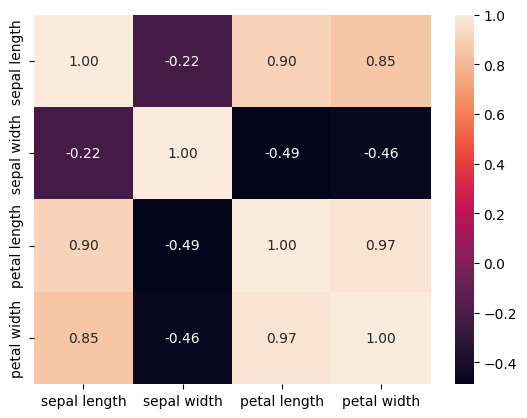

In [165]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True, fmt='.2f')

Esta es una matriz de correlacion, que muestra cuando describe una variable a otra, lo que se espera es que las variables descriptivas no esten muy correcacionadas entre ellas, es decir sean independientes, y que asu vez describan mucho a la variable a predecir, ya que es dificil ver esto a simple viste usamos el VIF para que nos indique la correlacion que existe entre las variables y asi eliminarlas para evitar la multicolinialidad.

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Asumiendo que 'X' es tu DataFrame y ya tiene las columnas de interés

df_with_const = add_constant(X)

# Calcula el VIF para cada variable predictora
vif_data = pd.DataFrame()  # Usa 'pd.DataFrame()' en lugar de 'X.DataFrame()'
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

       Variable         VIF
0         const  138.514552
1  sepal length    9.912949
2   sepal width    2.242886
3  petal length   40.659934
4   petal width   19.271244


Eliminar la variable "petal length" ya que es la que tiene el VIF más alto, al hacer esto nos quedamos con variables más importantes

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Asumiendo que 'X' es tu DataFrame y ya tiene las columnas de interés
VIX = X[['sepal length', 'sepal width', 'petal width']]
df_with_const = add_constant(VIX)

# Calcula el VIF para cada variable predictora
vif_data = pd.DataFrame()  # Usa 'pd.DataFrame()' en lugar de 'X.DataFrame()'
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)


       Variable         VIF
0         const  135.195770
1  sepal length    4.277629
2   sepal width    1.473248
3   petal width    5.160044


Como vemos los valores quedan cercanos a 5 y asi nos aseguramos de que no exista multicolinealidad

<Axes: >

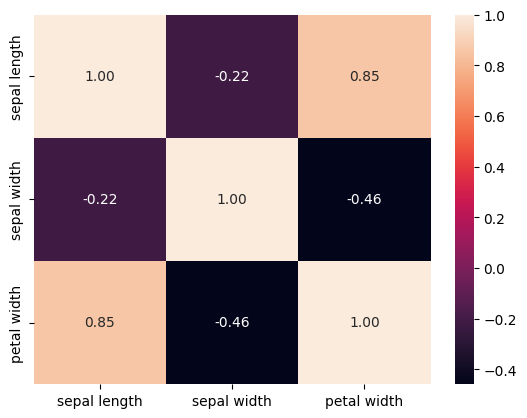

In [168]:
sns.heatmap(VIX.corr(), annot=True, fmt='.2f')

Volvemos a ver la matriz se confución y ahora se ve menos correlacio  entre variables.

In [190]:
# Elimino la columna "petal length" del data frame.
iris_df = iris_df_filtered.drop(columns = ["petal length"])

Me quedo con VIX, como las svaribles explicativas, y las etiquetas e iris_df como el data frame

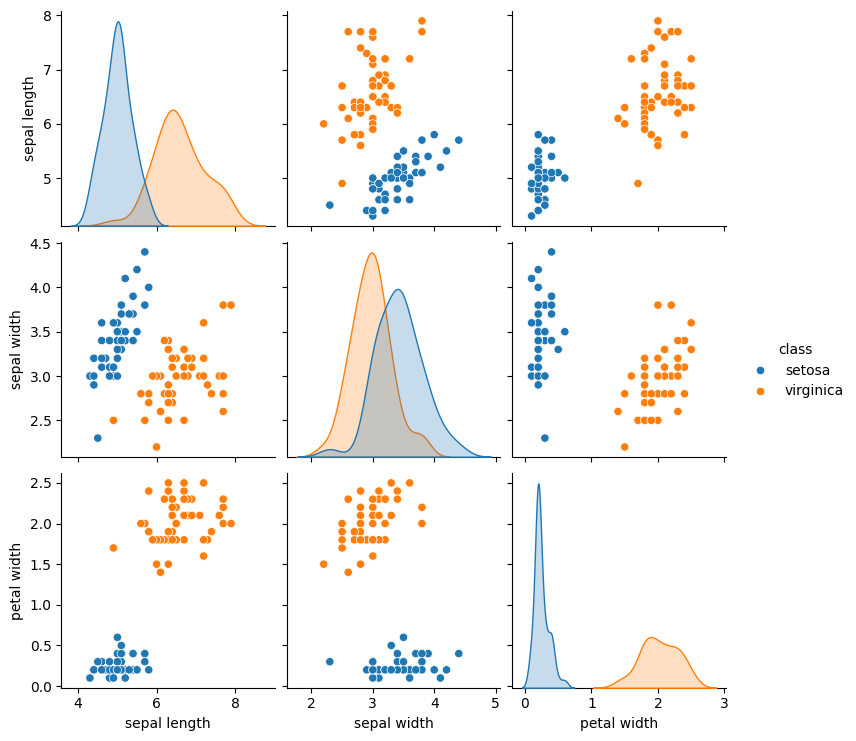

In [170]:
sns.pairplot(iris_df, hue='class')  
plt.show()

Vemos el grafico de puntos y hay algunos donde no queda muy claro cual seria la liena que los separa.

## Implementación del modelo

In [159]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC

In [188]:
iris_df.head()

,sepal length,sepal width,petal width,class
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


In [119]:
import plotly.express as px
import pandas as pd

fig = px.scatter_3d(iris_df, x='sepal length', y='sepal width', z='petal width',
                    color='class', symbol='class')


# Mostrar el gráfico
fig.show()


Aqui podemos ver los datos en 3 dimenciones gracias a que usamos cada variable para un eje, siedo x='sepal length', y='sepal width', z='petal length'

In [183]:
import plotly.express as px
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Codificamos las etiquetas de clase
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(iris_df['class'])

# Entrenamos el clasificador SVM con un kernel lineal
clf = svm.SVC(kernel='linear')
clf.fit(iris_df[['sepal length', 'sepal width', 'petal width']], y_encoded)

# Coeficientes del hiperplano
w = clf.coef_[0]
v = clf.intercept_

# Creamos un gráfico 3D interactivo usando plotly express
fig = px.scatter_3d(iris_df, x='sepal length', y='sepal width', z='petal width',
                    color='class', symbol='class')

# Creamos la malla para el hiperplano
xx, yy = np.meshgrid(np.linspace(iris_df['sepal length'].min(), iris_df['sepal length'].max(), 50),
                     np.linspace(iris_df['sepal width'].min(), iris_df['sepal width'].max(), 50))
zz = (-w[0] * xx - w[1] * yy - v) / w[2]

# Añadimos el hiperplano al gráfico
fig.add_traces(go.Surface(x=xx, y=yy, z=zz, name='SVM Hyperplane', opacity=0.5, showscale=False))

# Mostrar el gráfico
fig.show()


Como podemos ver usando todos los datos podemos graficar un hiperplano que los separa, pero ahora lo haremos valiando

## Preprocesamiento de los datos

In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


iris_df = iris_df.sample(frac=1).reset_index(drop=True)

# Separa las clases
setosa = iris_df[iris_df['class'] == 'setosa']
virginica = iris_df[iris_df['class'] == 'virginica']

# Selecciona 5 muestras aleatorias de cada clase para el conjunto de prueba
setosa_test = setosa.sample(5)
virginica_test = virginica.sample(5)

# Concatena las muestras de prueba en un único DataFrame
test_df = pd.concat([setosa_test, virginica_test])

# Elimina las muestras de prueba del DataFrame original para obtener el conjunto de entrenamiento
train_df = iris_df.drop(test_df.index)

# Ahora tienes tus conjuntos de entrenamiento y prueba
print("Conjunto de Entrenamiento:")
print(train_df)
print("\nConjunto de Prueba:")
print(test_df)

# Si necesitas las características y las etiquetas por separado:
X_train = train_df[['sepal length', 'sepal width', 'petal width']]
y_train = train_df['class']
X_test = test_df[['sepal length', 'sepal width', 'petal width']]
y_test = test_df['class']


Conjunto de Entrenamiento:
    sepal length  sepal width  petal width      class
1            5.8          2.7          1.9  virginica
3            5.5          3.5          0.2     setosa
4            5.0          3.5          0.6     setosa
5            4.4          2.9          0.2     setosa
6            7.2          3.6          2.5  virginica
..           ...          ...          ...        ...
95           6.0          2.2          1.5  virginica
96           5.3          3.7          0.2     setosa
97           4.7          3.2          0.2     setosa
98           6.7          2.5          1.8  virginica
99           5.4          3.9          0.4     setosa

[90 rows x 4 columns]

Conjunto de Prueba:
    sepal length  sepal width  petal width      class
24           5.4          3.4          0.4     setosa
39           5.1          3.7          0.4     setosa
2            5.1          3.8          0.3     setosa
19           4.8          3.4          0.2     setosa
34         

Los dividimos en entrenamiento y testeo, para despues escalarlos

In [196]:
X_train.shape

min_on_training = X_train.min(axis=0)
min_on_training.shape

range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training.shape

X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))

Minimum for each feature
sepal length    0.0
sepal width     0.0
petal width     0.0
dtype: float64


In [197]:
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Maximum for each feature
 sepal length    1.0
sepal width     1.0
petal width     1.0
dtype: float64


In [198]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [199]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [200]:
svc_C01 = SVC(C=0.1)
svc_C01.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc_C01.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_C01.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


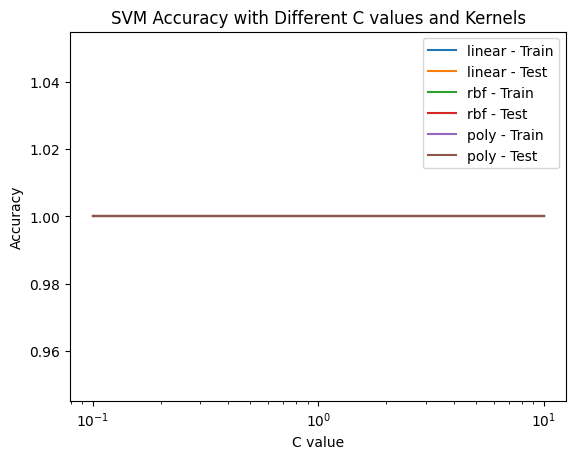

In [201]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Valores de C y tipos de kernel para probar
C_values = [0.1, 1, 10]
kernels = ['linear', 'rbf', 'poly']

# Almacenar resultados para la visualización
results = []

# Entrenar modelos y evaluar precisión
for kernel in kernels:
    for C in C_values:
        svc = SVC(C=C, kernel=kernel)
        svc.fit(X_train_scaled, y_train)
        train_accuracy = accuracy_score(y_train, svc.predict(X_train_scaled))
        test_accuracy = accuracy_score(y_test, svc.predict(X_test_scaled))
        results.append({'C': C, 'Kernel': kernel, 'Training Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

# Convertir resultados en un DataFrame para facilitar la visualización
results_df = pd.DataFrame(results)

# Gráfico de rendimiento
for kernel in kernels:
    subset = results_df[results_df['Kernel'] == kernel]
    plt.plot(subset['C'], subset['Training Accuracy'], label=f'{kernel} - Train')
    plt.plot(subset['C'], subset['Test Accuracy'], label=f'{kernel} - Test')

plt.legend()
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy with Different C values and Kernels')
plt.show()


Como para todos los procesos el clasificardor era perfecto decidi probar con otros datos